In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_26 (LSTM)                       │ (None, 7, 64)               │          20,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_27 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,673 (127.63 KB)

 Trainable params: 32,673 (127.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - loss: 1.1429 - val_loss: 0.7667
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1.0430 - val_loss: 0.7186
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.0494 - val_loss: 0.7565
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.0152 - val_loss: 0.7162
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.8835 - val_loss: 0.7241
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.8389 - val_loss: 0.6346
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.7782 - val_loss: 0.6318
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.9002 - val_loss: 0.5927
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.9508 - val_loss: 0.6398
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.7930 - val_loss: 0.6543
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.5982 - val_loss: 0.6113
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6185 - val_lo

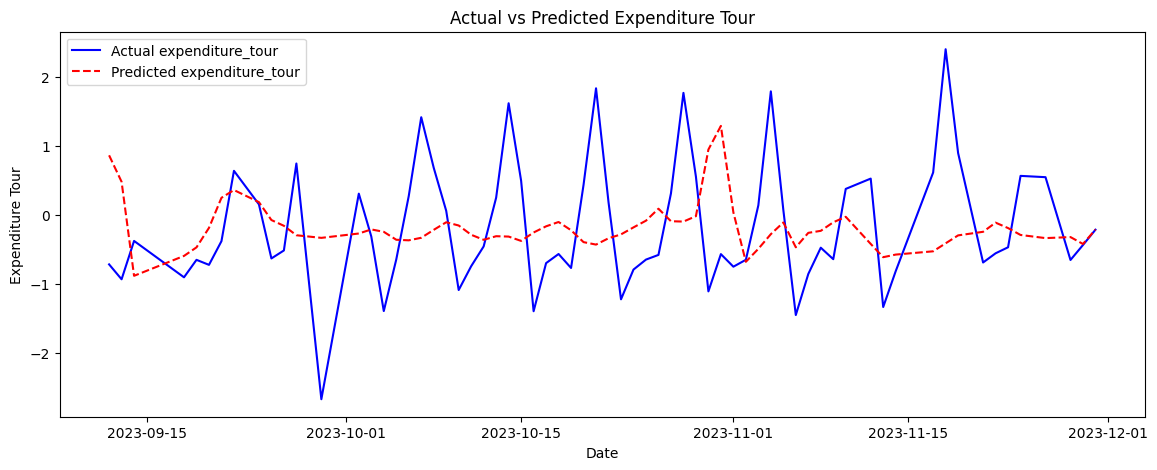

Mean Squared Error (MSE): 1.009794410583652
Mean Absolute Error (MAE): 0.7870752602453865
R² Score: -0.23741623865054362


In [58]:
# import libraries
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# read the excel file
data = pd.read_excel('/content/drive/MyDrive/workspace/dddata.xlsx')

# 날짜 열 처리
data['일자'] = pd.to_datetime(data['일자'], format='%Y%m%d')

# 독립변수와 종속변수 설정
features = data[['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7']].astype(float)
target = data['expenditure_tour'].astype(float)

# 데이터 표준화
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
# 타겟 값 스케일링
target_scaler = StandardScaler()
target_scaled = target_scaler.fit_transform(target.values.reshape(-1, 1))

# 학습 및 테스트 데이터 분리 (90% 학습, 10% 테스트)
n_train = int(0.8 * len(features_scaled))
train_features = features_scaled[:n_train]
train_target = target_scaled[:n_train]
test_features = features_scaled[n_train:]
test_target = target_scaled[n_train:]

len(train_features)

target

seq_len = 7  # 과거 14일을 기반으로 예측
trainX, trainY, testX, testY = [], [], [], []
for i in range(seq_len, len(train_features)):
    trainX.append(train_features[i-seq_len:i])
    trainY.append(train_target[i])

for i in range(seq_len, len(test_features)):
    testX.append(test_features[i-seq_len:i])
    testY.append(test_target[i])

trainX, trainY = np.array(trainX), np.array(trainY)
testX, testY = np.array(testX), np.array(testY)

# LSTM 모델 구성
model = Sequential()
model.add(LSTM(64, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(1))  # expenditure_tour 예측

model.summary()

# 모델 컴파일
learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mse')

from tensorflow.keras.callbacks import EarlyStopping

# 조기 종료 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 모델 학습
epochs = 100
batch_size = 32

history = model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size,
                    validation_split=0.1, verbose=1, callbacks=[early_stopping])

# 예측 및 결과 역변환
prediction = model.predict(testX)
testY_pred = prediction.flatten()

# 역변환 (inverse transform)
testY_pred_original = target_scaler.inverse_transform(testY_pred.reshape(-1, 1)).flatten()
testY_actual_original = target_scaler.inverse_transform(testY.flatten().reshape(-1, 1)).flatten()
# MSE 계산
mse = mean_squared_error(testY_actual_original, testY_pred_original)
print(f'Mean Squared Error (MSE): {mse}')
test_dates = data['일자'].values[n_train + seq_len:]

# 결과 시각화
plt.figure(figsize=(14, 5))
plt.plot(test_dates, testY, color='blue', label='Actual expenditure_tour')
plt.plot(test_dates, testY_pred, color='red', linestyle='--', label='Predicted expenditure_tour')
plt.xlabel('Date')
plt.ylabel('Expenditure Tour')
plt.title('Actual vs Predicted Expenditure Tour')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 예측 및 실제 값
testY_pred = prediction.flatten()  # 예측 값
testY_actual = testY.flatten()      # 실제 값

# MSE 계산
mse = mean_squared_error(testY_actual, testY_pred)
print(f'Mean Squared Error (MSE): {mse}')

# MAE 계산
mae = mean_absolute_error(testY_actual, testY_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# R² 점수 계산
r2 = r2_score(testY_actual, testY_pred)
print(f'R² Score: {r2}')

In [59]:
# MAPE (Mean Absolute Percentage Error) 계산
mape = np.mean(np.abs((testY_actual_original - testY_pred_original) / testY_actual_original)) * 100
print('The MAPE of LSTM is:', mape, '%')

The MAPE of LSTM is: 14.353293241740559 %


In [60]:
jjh = pd.DataFrame({'Predicted' : testY_pred_original, 'Actual' : testY_actual_original})
jjh.to_excel('LSTM(외생+날짜)_res.xlsx')